In [1]:
import numpy as np
import pandas as pd

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 
#warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

import eli5
from eli5.sklearn import PermutationImportance

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Gold1.csv')

df

,datetime,US_interest_rate,Gold_Price,Gold_Change,Silver_Price,Silver_Change,US_10_year_rate,10_year_rate_Change,DollarIndex,DollarIndex_Change,USD_KRW_Price,USD_KRW_Change
0,2021-04-26,1.1,1776.80,0.12,25.990,-0.02,1.5648,0.12,90.757,-0.09,1115.13,0.04
1,2021-04-25,1.1,1774.65,-0.13,25.995,-0.31,1.5630,0.22,90.839,-0.53,1115.13,0.04
2,2021-04-23,1.1,1777.00,-0.24,26.075,-0.40,1.5595,1.16,90.839,-0.53,1114.72,-0.36
3,2021-04-22,1.1,1781.20,-0.62,26.180,-1.47,1.5416,-1.12,91.321,0.21,1118.79,0.22
4,2021-04-21,1.1,1792.30,0.84,26.570,2.83,1.5590,-0.45,91.129,-0.11,1116.35,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
7964,1990-01-08,8.1,403.00,-0.81,5.244,-1.39,8.0260,1.17,92.800,-0.88,683.60,-0.01
7965,1990-01-05,8.1,406.30,1.93,5.318,0.95,8.0260,0.00,93.620,0.49,683.70,-0.07
7966,1990-01-04,8.1,398.60,1.17,5.268,2.27,8.0260,0.00,93.160,-2.16,684.20,0.10
7967,1990-01-03,8.1,394.00,-1.40,5.151,-0.62,8.0260,0.00,95.220,0.02,683.50,0.31


In [9]:
df = df.sort_values(by = 'datetime')

df

,datetime,US_interest_rate,Gold_Price,Gold_Change,Silver_Price,Silver_Change,US_10_year_rate,10_year_rate_Change,DollarIndex,DollarIndex_Change,USD_KRW_Price,USD_KRW_Change
7968,1990-01-02,8.1,399.60,-0.72,5.183,-0.48,8.0260,0.00,95.200,1.35,683.50,0.00
7967,1990-01-03,8.1,394.00,-1.40,5.151,-0.62,8.0260,0.00,95.220,0.02,683.50,0.31
7966,1990-01-04,8.1,398.60,1.17,5.268,2.27,8.0260,0.00,93.160,-2.16,684.20,0.10
7965,1990-01-05,8.1,406.30,1.93,5.318,0.95,8.0260,0.00,93.620,0.49,683.70,-0.07
7964,1990-01-08,8.1,403.00,-0.81,5.244,-1.39,8.0260,1.17,92.800,-0.88,683.60,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-04-21,1.1,1792.30,0.84,26.570,2.83,1.5590,-0.45,91.129,-0.11,1116.35,-0.08
3,2021-04-22,1.1,1781.20,-0.62,26.180,-1.47,1.5416,-1.12,91.321,0.21,1118.79,0.22
2,2021-04-23,1.1,1777.00,-0.24,26.075,-0.40,1.5595,1.16,90.839,-0.53,1114.72,-0.36
1,2021-04-25,1.1,1774.65,-0.13,25.995,-0.31,1.5630,0.22,90.839,-0.53,1115.13,0.04


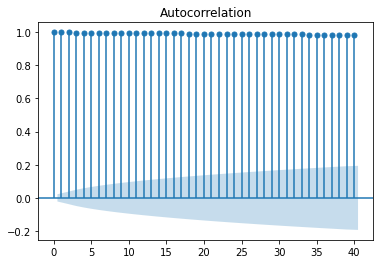

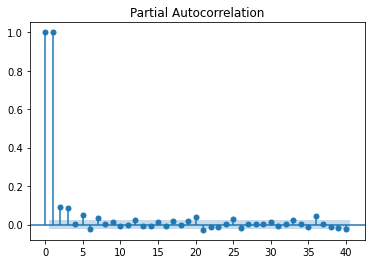

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Gold_Price'])
plot_pacf(df['Gold_Price'])
plt.show()

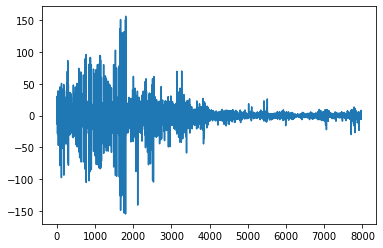

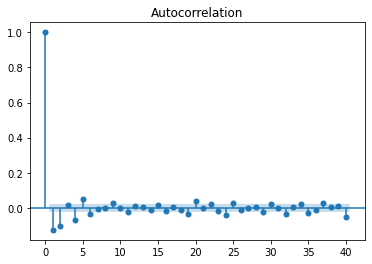

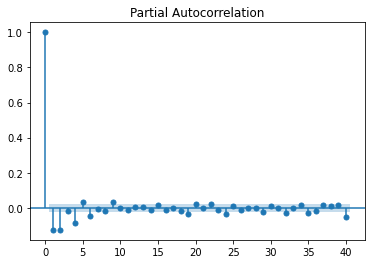

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=df['Gold_Price'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [6]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Gold_Price'], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Gold_Price   No. Observations:                 7968
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -32133.523
Method:                       css-mle   S.D. of innovations             13.652
Date:                Tue, 27 Apr 2021   AIC                          64271.046
Time:                        14:05:02   BIC                          64285.012
Sample:                             1   HQIC                         64275.827
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ma.L1.D.Gold_Price    -0.1628      0.013    -13.012      0.000      -0.187      -0.138
                                    Roots                                    
                  Real       

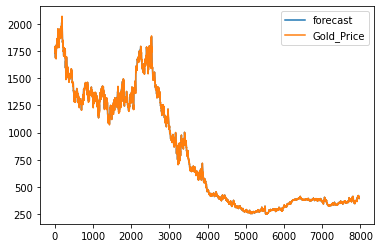

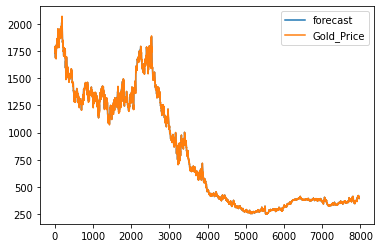

In [7]:
model_fit.plot_predict()

In [8]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([1776.53631444]), array([13.65193721]), array([[1749.77900919, 1803.29361969]]))
